# RATINGS PREDICTION

## Problem statement:
The rise in E-commerce, has brought a significant rise in the importance of customer reviews. There are hundreds of review sites online and massive amounts of reviews for every product. Customers have changed their way of shopping and according to a recent survey, 70 percent of customers say that they use rating filters to filter out low rated items in their searches.
The ability to successfully decide whether a review will be helpful to other customers and thus give the product more exposure is vital to companies that support these reviews, companies like Google, Amazon, flipkart and Yelp!. In the present system, the e-commerce platform will send a feedback mail to customers after the product is delivered. The customers can give ratings out of 5, also can write down some comments/reviews about the product that he/she has purchased. Using these reviews and ratings, e-commerce platform will rate the products, which helps other people to get the insights about the quality of the product. But many times, customers would not give any ratings or reviews. How to predict the review score that a customer could give? This is the problem in e-commerce business.

There are two main methods to approach this problem. The first one is based on review text content analysis and uses the principles of natural language process (the NLP method). This method lacks the insights that can be drawn from the relationship between costumers and items. The second one is based on recommender systems, specifically on collaborative filtering, and focuses on the reviewer’s point of view. Use of the user’s similarity matrix and applying neighbors analysis are all part of this method. This method ignores any information from the review text content analysis.

### Business Goal: 
> We have a client who has a website where people write different reviews for technical products. 
Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) 
as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 
3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the 
past and they don’t have a rating. So, we have to build an application which can predict the rating 
by seeing the review.

## Data Collection Phase:
I have done web scraping to collect the data of customers review ratings from the well known website https://www.flipkart.com/ and https://www.amazon.com/. In this section I have scraped the reviews of different laptops, Phones, Headphones, smart 
watches, Professional Cameras, Printers, Monitors, Home theatre, Router from the above 2 mentioned e-commerce websites.

## Model Building Phase:
After collecting the data, we need to build a machine learning model. Before model building should do 
all data preprocessing steps involving NLP. Try different models with different hyper parameters 
and select the best model.

### Importing necessary libraries/dependencies

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
# Importing nltk libraries
import nltk
import re
import string
from nltk import FreqDist
from nltk.corpus import wordnet
from scipy.sparse import hstack
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve,accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
# Defining different algorithms
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Importing collected dataset

In [2]:
# Reading the csv file
df = pd.read_csv("reviews&ratings.csv")
df

,Unnamed: 0,Review_title,Review_text,Ratings
0,0,NaN,NaN,NaN
1,1,Just OK,Battery back up is very poor. Last 2.5 to 3 ho...,3.0 out of 5 stars
2,2,Not bad,NaN,3.0 out of 5 stars
3,3,Received faulty product,Don't Purchase<br><br>Cooling Fan noise issue<...,1.0 out of 5 stars
4,4,Overheating,Defective design<br>Overheating<br>Vent at the...,1.0 out of 5 stars
...,...,...,...,...
24299,24299,Best in the market!,Once again Noise has delivered a really good p...,5
24300,24300,Value-for-money,This is my first smart watch and its design is...,4
24301,24301,Simply awesome,Im Pretty Happy about the purchase. All the ac...,5
24302,24302,Superb till the product working.,Excellent Product from Noise.\nBattery- 9 Days...,4


Here I am importing the colleced dataset which is in comma separated values (csv) format and storing it into dataframe (df) for further usage. Here we can observe first 5 and last 5 rows of the dataset. There are 24304 rows and 4 columns in the dataframe. The dataset contains categorical data and contains both dependent and indepednent variables. We have our target variable <font color=blue>"Ratings"</font> which stores the ratings of the customers reviews and it is categorical in nature which has multiclasses that makes this problem to be a <font color=blue>"Classification Problem"</font>.

## Data description
- Review_title : Title of the review
- Review_text : Content of the review text
- Ratings : Ratings out of 5 stars

## Exploratory Data Analysis (EDA)

In [3]:
# Dropping unnamed column 
df.drop(["Unnamed: 0"],axis=1,inplace = True)

In [4]:
# Checking the dimensions of the dataset
print("There are {} Rows and {} Columns in dataframe".format(df.shape[0], df.shape[1]))

There are 24304 Rows and 3 Columns in dataframe


The dataset contains 24304 rows and 3 columns.

In [5]:
# Checking the column names present in the dataset
print("Columns present in dataset:\n", df.columns)

Columns present in dataset:
 Index(['Review_title', 'Review_text', 'Ratings'], dtype='object')


These are the columns present in the dataset.

In [6]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24304 entries, 0 to 24303
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_title  23186 non-null  object
 1   Review_text   22999 non-null  object
 2   Ratings       23188 non-null  object
dtypes: object(3)
memory usage: 569.8+ KB


By checking the above observations we can say the dataset contains 3 columns viz. Review_title, Review_title, Ratings. We can notice all the columns are <font color=red>object data type</font>. Out of 3 columns 2 are <font color=blue>indepednent variables</font> and remaining one is our target variable that is <font color=blue>"Ratings"</font> which is <font color=blue>depednent variable</font>. 

### Checking null values

In [7]:
# Displaying the columns containing null values count and their % i.e. ((count of null)/24304)/100

null = pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum())
null.columns=['Count of Null Values']
null['% of Null Values']=null['Count of Null Values']/243.04     # 24304/100 = 243.04
null

,Count of Null Values,% of Null Values
Review_title,1118,4.600066
Review_text,1305,5.369487
Ratings,1116,4.591837


From the above observation we can notice there are missing values present in all the 3 columns also we can observe the percentage of the missing values in each column. We will use imputation methods to fill up these missing values.

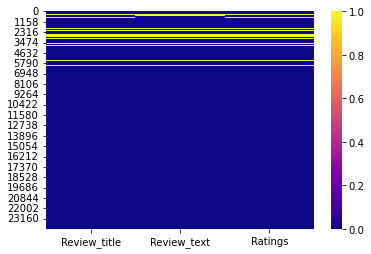

In [8]:
# Let's visualize the null values clearly in dataset using heat map
sns.heatmap(df.isnull(), cmap="plasma")
plt.show()

From the above heat map we can notice the white line which shows the missing values in the dataset.

### Treating null values using imputation techniques
Instead of removing the rows having NAN values we can fill them using imputation methods like mean, mode and median. 
Since all the 3 columns are having categorical data, let's fill the null values using mode values. 

In [9]:
# Filling null values of object data column with their mode values (most frequently occurred values).

col1=df.columns.values
for i in range(0,len(col1)):
    if df[col1[i]].dtype == "object":
        df[col1[i]].fillna(df[col1[i]].mode()[0], inplace=True)

In [10]:
# Lets check the null values again
df.isnull().sum()

Review_title    0
Review_text     0
Ratings         0
dtype: int64

We are successfully filled the null values using mode method and there are no any missing values in the dataset.

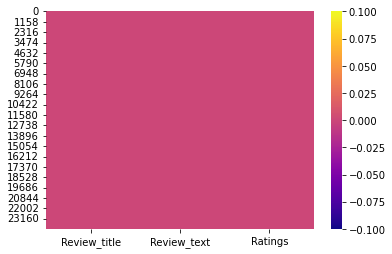

In [11]:
# Let's visualize the null values clearly in dataset using heat map
sns.heatmap(df.isnull(), cmap="plasma")
plt.show()

From the heat map we can clearly see that there are no missing values in the dataset.

In [12]:
# Checking number of unique values in each column of dataset
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
Review_title,3479
Review_text,9207
Ratings,10


Above are the number of unique values present in the columns of the dataset.
### Value Count Function

In [13]:
# Check value counts for each feature

cols=['Review_title', 'Review_text', 'Ratings']
for col in cols:
    print("Value Counts of {} :".format(col, df[col].nunique()))
    print(df[f'{col}'].value_counts())
    print('*'*100)

Value Counts of Review_title :
Wonderful                                                       2105
Excellent                                                        650
Must buy!                                                        645
Great product                                                    641
Classy product                                                   627
                                                                ... 
Camera don't like it                                               1
Recent apps issue                                                  1
Big Fan and User of K20 Pro. It's just spoiled the K Series.       1
Mobile is very slow                                                1
Upset                                                              1
Name: Review_title, Length: 3479, dtype: int64
****************************************************************************************************
Value Counts of Review_text :
Good                            

These are the value counts of the columns present in the dataset.

From the values count function we can notice that the target variable `"Ratings"` containing some duplicate string values like "star" which we need to replace them.

In [14]:
# Let's look at the unique values in the target column
df['Ratings'].unique()

array(['5', '3.0 out of 5 stars', '1.0 out of 5 stars',
       '5.0 out of 5 stars', '4.0 out of 5 stars', '2.0 out of 5 stars',
       '4', '1', '3', '2'], dtype=object)

In [15]:
# Replacing duplicated values in the label and converting the data to integer datatype
df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)
df['Ratings'] = df['Ratings'].astype('int')

In [16]:
# Checking value counts after replacing the values
df.Ratings.value_counts()

5    13509
4     4803
1     3161
3     1812
2     1019
Name: Ratings, dtype: int64

In [17]:
# Unique values after replacing the values
df.Ratings.unique()

array([5, 3, 1, 4, 2])

I have replaced all the duplicate categories present in the target column and converted the data into integer data type. Now let's combine both reviews title and text into one column as `"Reviews"`.

In [18]:
# Combining Review text and Review_title into one
df['Review'] = df['Review_title'].map(str)+' '+df['Review_text']

In [19]:
# Displaying the dataset again
df

,Review_title,Review_text,Ratings,Review
0,Wonderful,Good,5,Wonderful Good
1,Just OK,Battery back up is very poor. Last 2.5 to 3 ho...,3,Just OK Battery back up is very poor. Last 2.5...
2,Not bad,Good,3,Not bad Good
3,Received faulty product,Don't Purchase<br><br>Cooling Fan noise issue<...,1,Received faulty product Don't Purchase<br><br>...
4,Overheating,Defective design<br>Overheating<br>Vent at the...,1,Overheating Defective design<br>Overheating<br...
...,...,...,...,...
24299,Best in the market!,Once again Noise has delivered a really good p...,5,Best in the market! Once again Noise has deliv...
24300,Value-for-money,This is my first smart watch and its design is...,4,Value-for-money This is my first smart watch a...
24301,Simply awesome,Im Pretty Happy about the purchase. All the ac...,5,Simply awesome Im Pretty Happy about the purch...
24302,Superb till the product working.,Excellent Product from Noise.\nBattery- 9 Days...,4,Superb till the product working. Excellent Pro...


In [20]:
# Let's have a look at value count function of Review
df.Review.value_counts()

Wonderful Good                                                                 1144
Good Good                                                                        61
Super! Good                                                                      23
Highly recommended Good                                                          22
Great product Nice                                                               22
                                                                               ... 
Wonderful Just fantastic                                                          1
Terrific Asus "Rock Solid Heart Touching"...                                      1
Really Nice Good one.. will post a review once I use it for a month atleast       1
Awesome Awesome 👍 products 👍👍👍👍👍                                                  1
Wonderful Good watch @3499                                                        1
Name: Review, Length: 10008, dtype: int64

Let's remove Review_title and Review_text columns as we have got new <font color=red>"Review"</font> column which contains the combined texts of these two columns. 

In [21]:
# Dropping Review_title and Review_text column as we have got new Review column 
df.drop(columns=["Review_title","Review_text"],axis=1,inplace=True)

## Text Preprocessing
Using the text preprocessing techniques we can remove noise from raw data and makes raw data more valuable for building models. Pre-processing involves the following steps, but these will be performed in a slightly different manner:

- Text case conversion
- Removing Punctuations and other special characters
- Splitting the comments into individual words
- Removing Stop Words
- Stemming and Lemmatization
- Text Standardization-Normalization
- Splitting dataset into Training and Testing

In [22]:
# Creating new column for length of Reviews
df['original_length']=df.Review.str.len()
df

,Ratings,Review,original_length
0,5,Wonderful Good,14
1,3,Just OK Battery back up is very poor. Last 2.5...,63
2,3,Not bad Good,12
3,1,Received faulty product Don't Purchase<br><br>...,177
4,1,Overheating Defective design<br>Overheating<br...,88
...,...,...,...
24299,5,Best in the market! Once again Noise has deliv...,358
24300,4,Value-for-money This is my first smart watch a...,437
24301,5,Simply awesome Im Pretty Happy about the purch...,187
24302,4,Superb till the product working. Excellent Pro...,541


I have created new column <font color=green>"original_length"</font> which contains the length of the Review text.

-The string library contains punctuation characters. This is imported and all numbers are appended to this string. From the value count functions we have seen that our Review feature contains strings such as won't, didn't, etc which contain apostrophe character('). To prevent these words from being converted to wont/didnt, the character ' represented as ' in escape sequence notation is replaced by empty character in the punctuation string.

In [23]:
# Defining a function to replace some of the contracted words to their full form and removing urls and some unwanted text 
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) # Removing urls
    return text

In [24]:
# Removing punctuations
df['Review'] = df['Review'].str.replace(r'[^\w\d\s]', ' ')

Converting all our text into the lower case is a simple and most effective approach. If we are not applying lower case conversion on words like NLP, nlp, Nlp, we are treating all these words as different words/tokens. It is better to perform lower case the text as the first step in this text preprocessing. Because if we are trying to remove stop words all words need to be in lower case.

In [25]:
# Convert all comment texts to lower case in dataset
df['Review'] = df['Review'].apply(lambda x : x.lower())

df['Review'] = df['Review'].apply(lambda x : decontracted(x))

In [26]:
# Replacing '\n' in Review
df['Review'] = df['Review'].replace('\n',' ')

### Removing Stopwords

- <font color=red>Stopwords</font> are common words and irrelevant words from which we can't get any useful information for our model or problem statement.

- Few stopwords are "a", "an", "the", etc. Single letter words if existing or created due to any preprocessing step do not convey any useful meaning and hence can be directly removed. Hence letters from b to z, will be added to the list of stop words imported directly.

In [27]:
# Remove stopwords
stop_words = set(stopwords.words('english') + ['u','ü','ur','4','2','im','dont','doin','ure'])

df["Review"] = df["Review"].apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))

### Stemming and Lemmatization

- <font color=blue>Stemming</font> is the process of converting inflected/derived words to their word stem or the root form. Basically, a large number of similar origin words are converted to the same word.E.g. words like "stems", "stemmer", "stemming", "stemmed" as based on "stem". This helps in achieving the training process with a better accuracy.
- <font color=blue>Lemmatizing</font> is the process of grouping together the inflected forms of a word so they can be analysed as a single item. This is quite similar to stemming in its working but differs since it depends on correctly identifying the intended part of speech and meaning of a word in a sentence, as well as within the larger context surrounding that sentence, such as neighboring sentences or even an entire document.

In [28]:
# Defining function to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [29]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [30]:
#defining function to lemmatize our text
def lemmatize_sentence(sentence):
    #tokenize the sentence & find the pos tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)

In [33]:
df['Review'] = df['Review'].apply(lambda x : lemmatize_sentence(x))

## Text Normalization-Standardization
Let's remove all the noise data which is present in the text

In [34]:
# Removing noise data from the text
def noise_words(text):
    # Remove html markup
    text = re.sub("(<.*?>)", "", text)
    # Remove non-ASCII and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    # Remove white space
    text = text.strip()
    return text

In [35]:
df['Review'] = df['Review'].apply(lambda x : noise_words(x))

I have defined a function noise_words for removing the noise from the text. It will remove any html markups, digits,urls and white spaces from the text. Let's have a look at first two rows of the text from review column to understand it.

In [36]:
df['Review'][0]

'wonderful good'

In [37]:
df['Review'][1]

'ok battery back poor last   hour'

As we can observe all the text has been converted to lower case and removed irrelevant words, punctuations, stop words etc.

### Count of words in the text
Now, I am creating a column which contains count of words in the text.

In [38]:
# Creating column for word counts in the text
df['Review_word_count'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_word_count','Review']].head()

,Review_word_count,Review
0,2,wonderful good
1,8,ok battery back poor last hour
2,2,bad good
3,24,receive faulty product purchase br br cool fan...
4,10,overheat defective design br overheat br vent ...


In [39]:
# New column (clean_length) after removing punctuations, stopwords in dataset
df['clean_length'] =df.Review.str.len()
df

,Ratings,Review,original_length,Review_word_count,clean_length
0,5,wonderful good,14,2,14
1,3,ok battery back poor last hour,63,8,32
2,3,bad good,12,2,8
3,1,receive faulty product purchase br br cool fan...,177,24,140
4,1,overheat defective design br overheat br vent ...,88,10,62
...,...,...,...,...,...
24299,5,best market noise deliver really good product ...,358,31,225
24300,4,value money first smart watch design good brig...,437,47,313
24301,5,simply awesome ampretty happy purchase activit...,187,18,125
24302,4,superb till product work excellent product noi...,541,68,395


I have created new column "clean_length" in dataset after cleaning the data. We can see that nearly half of the text has been removed from the Review after using required pre-processing.

In [40]:
# Total length removal in data
print('Original Length:',df.original_length.sum())
print('Clean Length:',df.clean_length.sum())
print("Total Words Removed:", (df.original_length.sum()) - (df.clean_length.sum()))

Original Length: 3628289
Clean Length: 2437014
Total Words Removed: 1191275


Above are the total length of dataset before and after cleaning data. And the total words removed after preprocessing.

In [41]:
# Statistical summary of dataset
df.describe()

,Ratings,original_length,Review_word_count,clean_length
count,24304.000000,24304.00000,24304.000000,24304.000000
mean,4.007242,149.28773,16.369775,100.272136
std,1.403095,195.02962,21.703889,124.072789
min,1.000000,4.00000,1.000000,0.000000
25%,4.000000,34.00000,4.000000,27.000000
50%,5.000000,82.00000,9.000000,58.000000
75%,5.000000,199.00000,21.000000,132.000000
max,5.000000,6028.00000,886.000000,3954.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

From the above description we can observe the following things
- The counts of every column is same which means there are no missing values present in the dataset.
- The mean value is greater than the median in all the columns except the target column Ratings. So, the data in these columns are skewed to right and in target it is skewed to left.
- There is a huge difference between 75% percentile and max values so, we can say there are some outliers present in the data. Since Review_length Review_word_count and clean_length columns are continuous numerical columns, we need to remove skewness and outliers in these columns except target column. 

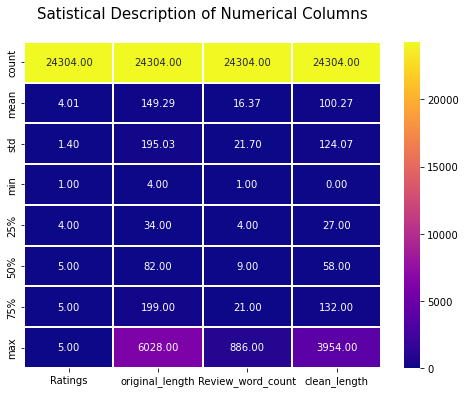

In [42]:
# Visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (8,6))
sns.heatmap(round(df.describe()[0:],2), linewidth = 2, annot= True, fmt = ".2f", cmap="plasma")
plt.title("Satistical Description of Numerical Columns\n",fontsize=15)

plt.show()

From the heat map we can observe the statistical summary of the numerical features present in the dataset.

## Visualizations
### Target Variable "Ratings"

5    13509
4     4803
1     3161
3     1812
2     1019
Name: Ratings, dtype: int64


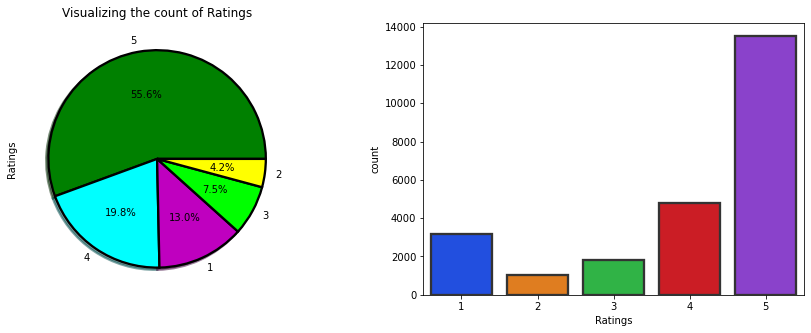

In [43]:
# Visualizing the target variable
print(df['Ratings'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['5', '4', '1', '3', '2']
colors = ["green", "cyan", "m", "lime", "yellow"]
df['Ratings'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,colors=colors,
                                              wedgeprops = {'linewidth':2.3, 'edgecolor':'k'},
                                              title = 'Visualizing the count of Ratings')
ax = sns.countplot('Ratings', data=df, ax=ax[1],palette="bright",linewidth=2.3, edgecolor=".2")
plt.show()

- Looking at the above pie chart and count plot for our target variable "Ratings" we can say that the dataset contains the more review text rated as 5 star compared to other review ratings and very less reviews rated as 2 compared to others. Around 55% of the texts are rated as 5 and only 4% of the texts rated as 2 stars.
- So, we can say that there is "imbalance problem" which we need to make it balance to build our model.

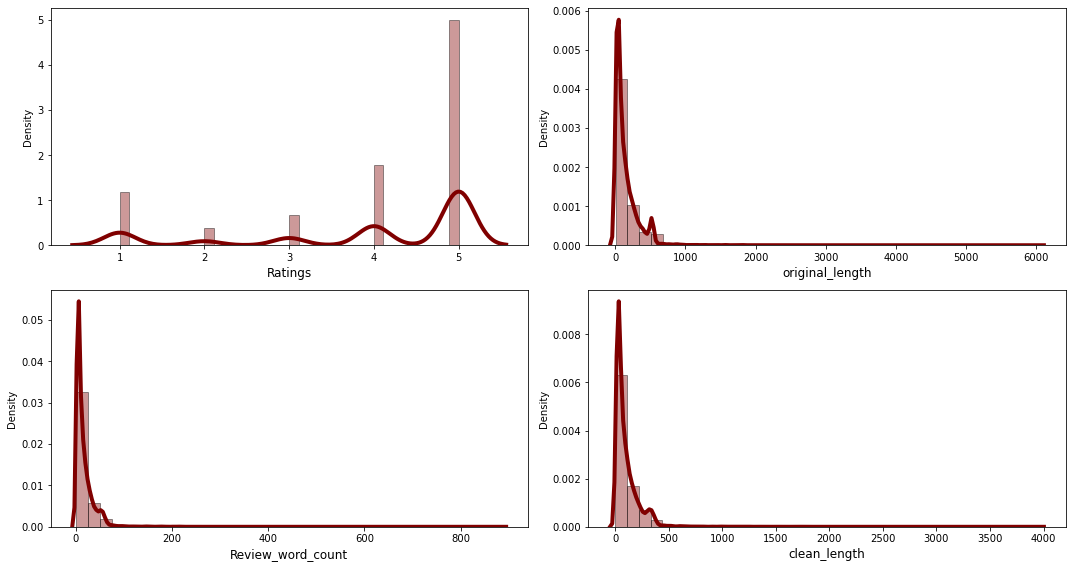

In [44]:
# Checking how the data has been distriubted in each column using histogram and density plots
col = ["Ratings","original_length","Review_word_count","clean_length"]
plt.figure(figsize=(15,8),facecolor='white')
plotnumber=1
for column in col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column],color="maroon",hist=True, kde = True,bins = int(180/5),hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

- From the dist plot we can notice that data in all the columns are skewed to right except the target column. Which means the mean value is greater than the median in these columns.
- From the histogram of `Review_word_count` we can clearly observe that most of our text is having the number of words in the range of 0 to 200, and some of the text are too lengthy which are out of range which acts as outliers in our data.
- Also, the plot of `clean_length` also quite similar to the histogram of Review_word_count. 
- Since there is skewness in the data we need to remove it before building the machine learning models.

## Identifying Outiers

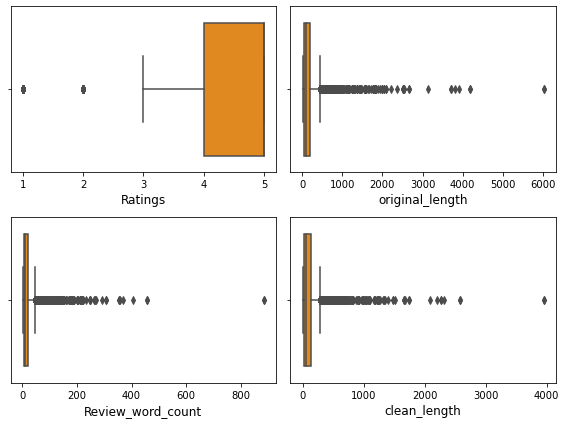

In [45]:
# Checking how the data has been distriubted in each column using histogram and density plots
col = ["Ratings","original_length","Review_word_count","clean_length"]
plt.figure(figsize=(8,6),facecolor='white')
plotnumber=1
for column in col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color="darkorange")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

As we can observe all the coluns contains outliers except the target column that is "Ratings". Let's remove the outliers using appropriate techniques.

## Removing outliers
### 1. Zscore method

In [46]:
# Features containing outliers
features = df[['original_length', 'Review_word_count', 'clean_length']]
               
# Using zscore to remove outliers               
from scipy.stats import zscore

z=np.abs(zscore(features))
z

,original_length,Review_word_count,clean_length
0,0.693692,0.662097,0.695349
1,0.442443,0.385643,0.550270
2,0.703947,0.662097,0.743709
3,0.142096,0.351568,0.320205
4,0.314255,0.293491,0.308472
...,...,...,...
24299,1.070179,0.674097,1.005300
24300,1.475254,1.411307,1.714576
24301,0.193371,0.075114,0.199305
24302,2.008517,2.378896,2.375492


In [47]:
# Creating new dataframe by setting z to 3
new_df = df[(z<3).all(axis=1)] 
new_df

,Ratings,Review,original_length,Review_word_count,clean_length
0,5,wonderful good,14,2,14
1,3,ok battery back poor last hour,63,8,32
2,3,bad good,12,2,8
3,1,receive faulty product purchase br br cool fan...,177,24,140
4,1,overheat defective design br overheat br vent ...,88,10,62
...,...,...,...,...,...
24299,5,best market noise deliver really good product ...,358,31,225
24300,4,value money first smart watch design good brig...,437,47,313
24301,5,simply awesome ampretty happy purchase activit...,187,18,125
24302,4,superb till product work excellent product noi...,541,68,395


This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

In [48]:
# Checking the shape of dataset before and after removing outliers
print("Shape of dataset before removing outliers:", df.shape)
print("Shape of dataset after removing outliers:", new_df.shape)

Shape of dataset before removing outliers: (24304, 5)
Shape of dataset after removing outliers: (24046, 5)


In [49]:
# Checking the the data loss after removing outliers
data_loss = (24304-24046)/24304*100
data_loss

1.0615536537195522

The acceptable range of data loss is 10%. By using Zscore I am losing around 1.06% of data which is acceptable. Let's try to remove outliers using IQR method.

### ii) IQR (Inter Quartile Range) method

In [50]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [51]:
print("Shape of data after using IQR method:", df1.shape)

Shape of data after using IQR method: (22255, 5)


In [52]:
# Checking the the data loss after removing outliers
data_loss = (24304-22255)/24304*100
data_loss

8.43071099407505

By using IQR method, I am losing around 8.4% of data which is more compared to Zscore methods. So, considering `Zscore method` as the data loss is very less using this method. 

## Checking for skewness in dataset

In [53]:
# Checking the skewness
new_df.skew()

Ratings             -1.242774
original_length      1.501086
Review_word_count    1.571956
clean_length         1.498107
dtype: float64

Here we can observe the skewness present in all the columns. But Ratings column is our target and it has categorical data so no need to remove skewness in this column. Let's remove skewness in the remaining columns using `yeo-johnson method`. 

## Removing skewness using yeo-johnson method

In [54]:
# Removing skewness using yeo-johnson  method to get better prediction
features= ['original_length', 'Review_word_count', 'clean_length']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [55]:
new_df[features] = scaler.fit_transform(new_df[features].values)
new_df[features]

,original_length,Review_word_count,clean_length
0,-1.643801,-1.625460,-1.514939
1,-0.240020,-0.155327,-0.630350
2,-1.784150,-1.625460,-2.111002
3,0.729067,0.969487,0.892467
4,0.074231,0.082587,0.064255
...,...,...,...
24299,1.384007,1.211029,1.359043
24300,1.568273,1.584727,1.676484
24301,0.780376,0.687777,0.779247
24302,1.764957,1.896378,1.896678


In [56]:
# Checking skewness after using yeo-johnson method
new_df[features].skew()

original_length      0.006046
Review_word_count    0.058423
clean_length         0.018109
dtype: float64

We can notice there is no skewness in the data after using `yeo-johnson method`. Let's visualize the distribution of data after removing outliers and skewness.

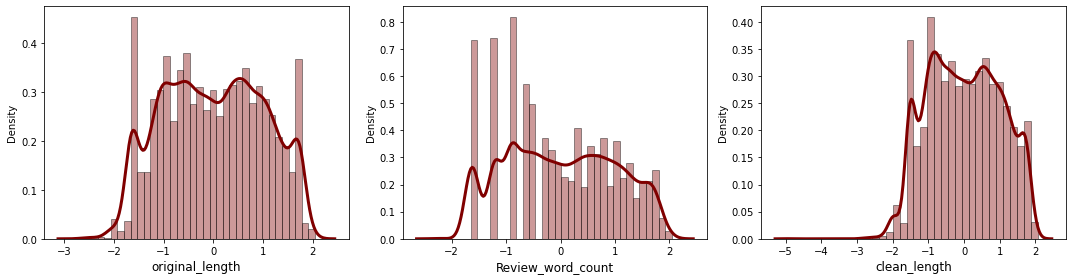

In [57]:
# Checking how the data has been distriubted in each column 
col = ["original_length","Review_word_count","clean_length"]
plt.figure(figsize=(15,4),facecolor='white')
plotnumber=1
for column in col:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.distplot(new_df[column],color="maroon",hist=True, kde = True,bins = int(180/5),hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':3})
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

The data looks almost normal after removing the skewness compared to the previous data.

## Plotting WordCloud
### Words for rating = 1

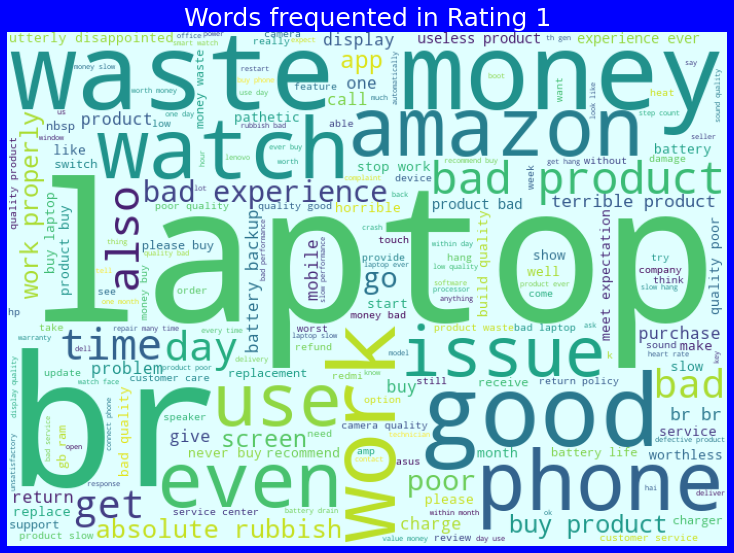

In [58]:
# Getting sense of loud words in Ratings
from wordcloud import WordCloud

# Print only rows where the review rated as 1 (ie. Rating=1 star)
rating1 = new_df['Review'][new_df['Ratings']==1]

word_cloud = WordCloud(width=700,height=500,background_color='lightcyan',max_words=200,
                       stopwords = stop_words,).generate(' '.join(rating1))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in Rating 1",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

From the above plot we can clearly notice the loud words which are rated as 1. The enlarged words in the plots are the most used texts for ratings 1.
### Words for rating = 2

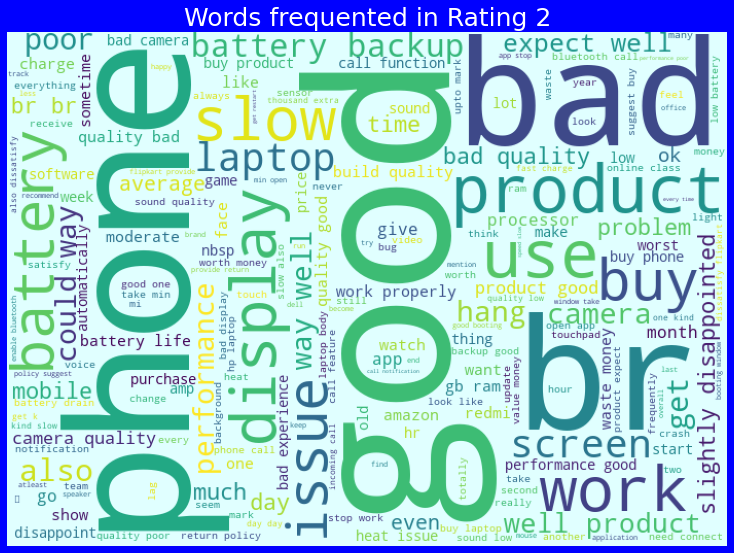

In [59]:
# Getting sense of loud words in Ratings
# Print only rows where the review rated as 2 (ie. Rating=2 star)
rating2 = new_df['Review'][new_df['Ratings']==2]

word_cloud = WordCloud(width=700,height=500,background_color='lightcyan',max_words=200,
                       stopwords = stop_words,).generate(' '.join(rating2))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in Rating 2",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

From the plot we can get the sense of words which are used more in the reviews that are rated as 2 stars.
### Words for rating = 3

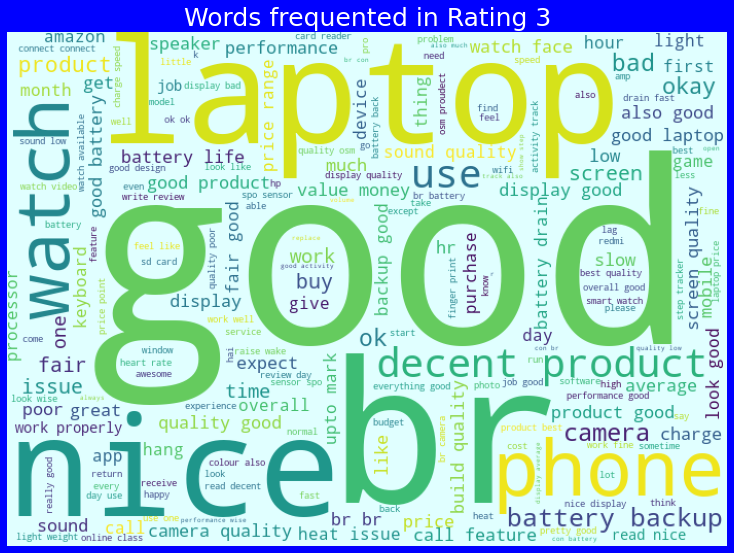

In [60]:
# Getting sense of loud words in Ratings
# Print only rows where the review rated as 3 (ie. Rating=3 star)
rating3 = new_df['Review'][new_df['Ratings']==3]

word_cloud = WordCloud(width=700,height=500,background_color='lightcyan',max_words=200,
                       stopwords = stop_words,).generate(' '.join(rating3))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in Rating 3",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

From the above plot we can get the sense of words which are used most likely in reviews which are rated as 3 stars.
### Words for rating = 4

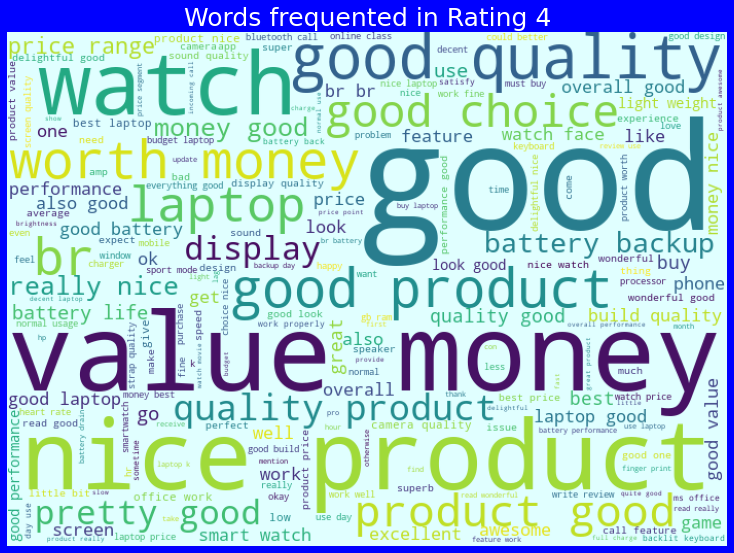

In [61]:
# Getting sense of loud words in Ratings
# Print only rows where the review rated as 4 (ie. Rating=4 star)
rating4 = new_df['Review'][new_df['Ratings']==4]

word_cloud = WordCloud(width=700,height=500,background_color='lightcyan',max_words=200,
                       stopwords = stop_words,).generate(' '.join(rating4))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in Rating 4",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

Above are the words which are frequented most in the reviews that are rated as 4 stars.
### Words for rating = 5

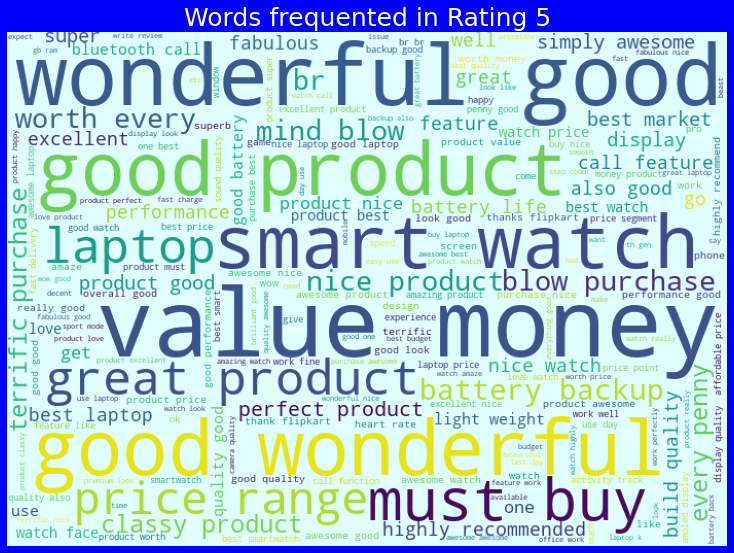

In [62]:
# Getting sense of loud words in Ratings
# Print only rows where the review rated as 5 (ie. Rating=5 star)
rating5 = new_df['Review'][new_df['Ratings']==5]

word_cloud = WordCloud(width=700,height=500,background_color='lightcyan',max_words=200,
                       stopwords = stop_words,).generate(' '.join(rating5))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in Rating 5",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

Above plot gives the sense of words that are used more in the reviews which are rated as 5 stars.

## Checking for correlation in  dataset

In [63]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,Ratings,original_length,Review_word_count,clean_length
Ratings,1.000000,-0.181988,-0.167356,-0.151824
original_length,-0.181988,1.000000,0.986047,0.987370
Review_word_count,-0.167356,0.986047,1.000000,0.989613
clean_length,-0.151824,0.987370,0.989613,1.000000


This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map.

## Visualizing the correlation matrix by plotting heat map.

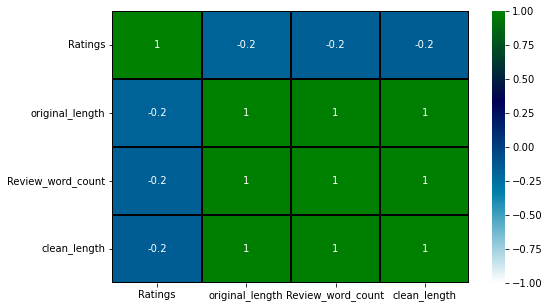

In [64]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(8,5))    
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,cmap="ocean_r",
            annot_kws={'size':10})
plt.yticks(rotation=0);

- The heat map gives the correlation between features and label. We can also observe the correlation between one feature to another.
- From the map we can notice length of the words are correlated with each other. All the features are negatively correlated with the label "Ratings".

> I have successfully completed cleaning the data. Let's use TF-IDF vactorizer, it'll help to transform the text data to feature vector which can be used as input in our modelling. It is a common algorithm to transform text into numbers. It measures the originality of a word by comparing the frequency of appearance of a word in a document with the number of documents the words appear in.

### Separating features and label into X and y

In [65]:
# Separating features and labels
x = df['Review']
y = df['Ratings']

### Converting tokens into vectors for moving forward to build machine learning model.

In [66]:
# Using the n_gram tfidf vectorizer(Word vectors)
word_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                analyzer = 'word',
                                token_pattern = r'\w{1,}',
                                stop_words = 'english',
                                ngram_range = (1,3),
                                strip_accents = 'unicode',
                                max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

In [67]:
# Character vectors
char_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'char',
                                stop_words = 'english',
                                ngram_range = (2,6),
                                max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

In [68]:
# I will combine both word vectors and character vectors as input for our model
X = hstack([train_char_features,train_word_features])

I have performed `TfIdf vectorizer` to convert words and characters into vectors to use them as an input to our model. I have converted features into number tokens in the dataset. And separated input and output variables.

# Machine Learning Model Building and Evaluation Metrics
## Finding Best Random State

In [69]:
# Determining Best Random State
SVC=LinearSVC()
max_score=0
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=r_state,test_size=0.30)
    SVC.fit(x_train,y_train)
    pred=SVC.predict(x_test)
    acc_score=accuracy_score(y_test,pred)
    if acc_score>max_score:
        max_score=acc_score
        final_r_state=r_state
print("The maximum accuracy score", max_score, "is achieved at", final_r_state)

The maximum accuracy score 0.9164838178826111 is achieved at 63


Great!!! With the help of random state selection process we have found our random state to be 63 with best accuracy as 91.64%.

## Splitting train and test data

In [70]:
# Splitting training and testing data 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=63)

I am taking 30% of the complete dataset for training purpose and the remaining 70% be used to train the machine learning models using the random state 67.

In [71]:
# Checking the dimension of train and test after splitting
print(x_train.shape,'\t',x_test.shape)        # Shape of x data
print(y_train.shape,'\t',y_test.shape)        # Shape of y data

(17012, 150000) 	 (7292, 150000)
(17012,) 	 (7292,)


Checked the dimension of both train and test data after splitting them.

## Balancing data using oversampling technique
From the visualization we have seen there is class imbalance issue, let's balance the data using oversampling method.

In [72]:
# Let's check the number of classes before fit
from collections import Counter
print("Count of classes before fit {}".format(Counter(y_train)))

Count of classes before fit Counter({5: 9441, 4: 3380, 1: 2198, 3: 1266, 2: 727})


Here we have the maximum count 9441 for rating 5, I am using this count to get the balanced data ensuring all the entries to be having the same count of 9441.

In [73]:
# Oversample and plot imbalanced dataset with SMOTE
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# Transform the dataset
os=SMOTE(sampling_strategy = {1: 9441, 2: 9441, 3: 9441, 4: 9441, 5: 9441})
x_train_os,y_train_os=os.fit_resample(x_train,y_train)

print("Count of classes before fit{}".format(Counter(y_train)))
print("Count of classes after fit {}".format(Counter(y_train_os)))

Count of classes before fitCounter({5: 9441, 4: 3380, 1: 2198, 3: 1266, 2: 727})
Count of classes after fit Counter({1: 9441, 2: 9441, 3: 9441, 5: 9441, 4: 9441})


<font color=red>"SMOTE"</font> is the oversampling mechanism that we are using to ensure that all the categories present in our target label have the same value. I have set the count of all the categories to be 9441 which is the highest count in the target column. After applying oversampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

In [74]:
# Let's check the value counts after using SMOTE
y_train_os.value_counts()

1    9441
2    9441
3    9441
5    9441
4    9441
Name: Ratings, dtype: int64

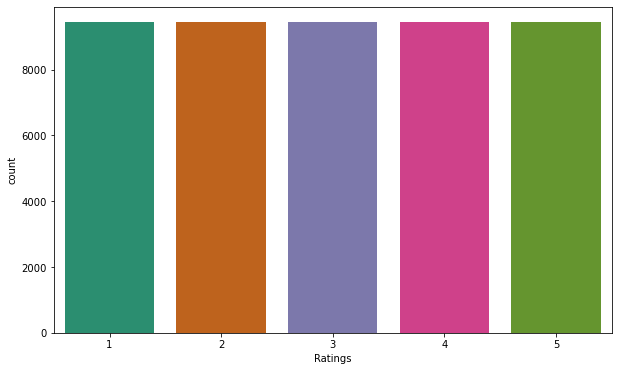

In [75]:
# Visualizing the data after oversampling
plt.figure(figsize=(10,6))
sns.countplot(y_train_os,palette="Dark2")
plt.show()

As we can observe all the categories in the target variable "Ratings" have equal values. The class imbalancing issue has been solved. Now we can build our machine learning models.

In [78]:
# Creating instances for different Classifiers

SVC = LinearSVC()
SGD = SGDClassifier()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
XT = ExtraTreesClassifier()

# Creating a list model where all the models will be appended for further evaluation in loop.
models=[]
models.append(('LinearSVC',SVC))
models.append(('SGDClassifier',SGD))
models.append(('DecisionTreeClassifier',DTC))
models.append(('RandomForestClassifier',RFC))
models.append(('XT = ExtraTreesClassifier',XT))

I have created `5 different classification algorithms` and are appended in the variable models. Now, let's run a for loop which contains the accuracy of the models along with different evaluation metrics.

In [79]:
# Creating empty lists
Model = []
Acc_score = []
cvs = []

for name,model in models:
    print("******************************",name,"******************************")
    print("\n")
    Model.append(name)
    model.fit(x_train_os,y_train_os)
    print(model)
    y_pred=model.predict(x_test)
# Accuracy Score
    acc_score=accuracy_score(y_test,y_pred)*100
    print('Accuracy_Score: ',acc_score)
    Acc_score.append(acc_score)
# Cross Validation Score
    cv=cross_val_score(model,X,y,cv=5,scoring='accuracy').mean()*100
    print('Cross Validation Score: ',cv)
    cvs.append(cv)
# Confusion Matrix
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print("\n")
# Classification Report
    print('Classification Report:\n ')
    print(classification_report(y_test,y_pred))

****************************** LinearSVC ******************************


LinearSVC()
Accuracy_Score:  91.29182665935272
Cross Validation Score:  82.8469044371808
Confusion matrix: 

[[ 879   36   22   16   10]
 [  48  195   29   15    5]
 [  36   26  432   39   13]
 [  14   13   39 1241  116]
 [   8    5   26  119 3910]]


Classification Report:
 
              precision    recall  f1-score   support

           1       0.89      0.91      0.90       963
           2       0.71      0.67      0.69       292
           3       0.79      0.79      0.79       546
           4       0.87      0.87      0.87      1423
           5       0.96      0.96      0.96      4068

    accuracy                           0.91      7292
   macro avg       0.84      0.84      0.84      7292
weighted avg       0.91      0.91      0.91      7292

****************************** SGDClassifier ******************************


SGDClassifier()
Accuracy_Score:  89.81075150850248
Cross Validation Score:  83.134

After running the for loop, we can able to observe the accuracy, and evaluation metrics of all the models.

## Model Selection

In [80]:
# Displaying Scores and metrics:
Results=pd.DataFrame({'Model': Model,'Accuracy Score': Acc_score,
                      'Cross Validation Score':cvs}) 
Results

,Model,Accuracy Score,Cross Validation Score
0,LinearSVC,91.291827,82.846904
1,SGDClassifier,89.810752,83.134910
2,DecisionTreeClassifier,87.397148,76.930195
3,RandomForestClassifier,91.223258,82.151494
4,XT = ExtraTreesClassifier,91.195831,82.102109


**After creating and training different classification algorithms, we can see that the difference between accuracy and cross validation score is less for <font color=red>"Stochastic Gradient Descent Classifier (SGDClassifier)"</font>. On this basis I can conclude that <font color=red>"SGDClassifier"</font> as the best fitting model. Now, we will try Hyperparameter Tuning to find out the best parameters and using them to improve the scores and metrics values.**

## Hyper Parameter Tuning

In [81]:
# Let's Use the GridSearchCV to find the best paarameters in SGDClassifier

# SGDClassifier
parameters = {'loss':['hinge','squared_hinge'],
              'penalty':['l2'],
              'n_jobs':[-1,None],
              'alpha':[0.0001,0.0005]}

# Running GridSearchCV for the model Bagging Regressor.
GCV=GridSearchCV(SGDClassifier(),parameters,cv=5)

In [82]:
# Training the best model
GCV.fit(x_train_os,y_train_os)

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.0005],
                         'loss': ['hinge', 'squared_hinge'],
                         'n_jobs': [-1, None], 'penalty': ['l2']})

I Have used 4 SGDClassifier parameters to be saved under the variable "parameters" that will be used in GridSearchCV for finding the best output. Assigned a variable to the GridSearchCV function after entering all the necessary inputs. And we used our training data set to make the GridSearchCV aware of all the hyper parameters that needs to be applied on our best model.

In [83]:
#Getting best parameters
GCV.best_params_

{'alpha': 0.0001, 'loss': 'hinge', 'n_jobs': None, 'penalty': 'l2'}

These are the best parameters of `SGD Classifier`.

### Creating final model

In [84]:
# Creating final model 
ratings_model = SGDClassifier(alpha=0.0001, loss='hinge', n_jobs= None, penalty='l2')
ratings_model.fit(x_train_os, y_train_os)
pred = ratings_model.predict(x_test)
acc_score = accuracy_score(y_test,pred)
print("Accuracy score:", acc_score*100)
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print('\n')
print('Classification Report:','\n',classification_report(y_test,pred))

Accuracy score: 89.90674712013164
Confusion Matrix: 
 [[ 881   41   19   18    4]
 [  46  203   29   13    1]
 [  33   30  439   34   10]
 [  22   19   51 1233   98]
 [  15    7   35  211 3800]]


Classification Report: 
               precision    recall  f1-score   support

           1       0.88      0.91      0.90       963
           2       0.68      0.70      0.69       292
           3       0.77      0.80      0.78       546
           4       0.82      0.87      0.84      1423
           5       0.97      0.93      0.95      4068

    accuracy                           0.90      7292
   macro avg       0.82      0.84      0.83      7292
weighted avg       0.90      0.90      0.90      7292



I have successfully incorporated the hyper parameter tuning using best parameters of `SGDClassifier` and the accuracy of the model has been increased after hyperparameter tuning and received the accuracy score as `89.90%` which is very good.

### Confusion Matrix

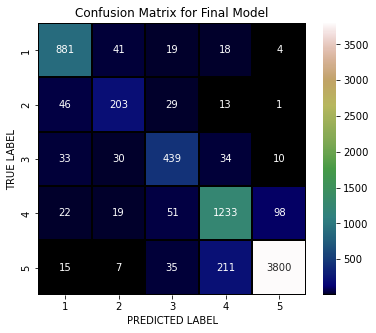

In [85]:
# Plot confusion matrix heatmap
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["1","2","3","4","5"]
y_axis_labels = ["1","2","3","4","5"]

f , ax = plt.subplots(figsize=(6,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gist_earth",
            xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Final Model')
plt.show()

With the help of confusion matrix we can able to see actual and predicted values for the final model. And also we can understand the number of times we got the correct outputs and the number of times my model missed to provide the correct prediction.

## Saving The Model

In [86]:
# Saving the model using .pkl
import joblib
joblib.dump(ratings_model,"Reviews_Ratings_Prediction.pkl")

['Reviews_Ratings_Prediction.pkl']

I am using the joblib option to save the final classification model in the form of .pkl.

## Loading and Predicting the Saved Model

In [87]:
# loading the final model
model = joblib.load('Reviews_Ratings_Prediction.pkl')

# Creating dataframe for predicted results
prediction=pd.DataFrame([model.predict(X)[:]],index=["Predicted"])
prediction.T

,Predicted
0,5
1,3
2,3
3,1
4,1
...,...
24299,5
24300,4
24301,5
24302,4


I have loaded the saved model to get the predictions for reviews ratings. Using classification model, we have got the predicted values for review ratings. 

## Saving the Predictions

In [88]:
# Saving the predicted values
prediction.to_csv('Ratings_Predicted_Values.csv')

Finally, saving the predicted values of the review ratings.

# Conclusion
- This case study gives an idea of NLP text processing in machine learning. In this case study, apart from applying the techniques that we have learnt in the EDA module. 
- From this dataset we were able to understand the idea of Natural Language Processing using machine learning models. This model helps us to understand the ratings of the products. On the basis of product review ratings one can easily buy their liked product without any fear.
- First we collected the dataset from the websites www.flipkart.com and www.amazon.com which is a web platform where the people can purchase their products. The data is scraped using Web scraping technique and the framework used is Selenium. We scrapped and fetched the data for different products like laptops, smart watches, phones etc. and saved the collected data in excel format. The dimension of the dataset is 101128 rows and 3 columns including target variable “Ratings”.Then, the scrapped data was saved in a excel file so that we can use further and analyse the data.
- Then we loaded the dataset and have done data cleaning, EDA process and text pre-processing techniques like: 
    - Text case conversion
    - Removing Punctuations and other special characters
    - Splitting the comments into individual words
    - Removing Stop Words
    - Stemming and Lemmatization 
    - Text Standardization-Normalization
    
- Then we did the model training, building the model and finding out the best model on the basis of different metrices like Accuracy Score, Cross Validation Score, precision, recall, f1score. We have created 6 different models. A Result table is made which is comprises of accuracy,cross validation score of each model. 
- We got SGDClassifier as the best model among all the models as it was giving least difference of accuracy and cv score. On this basis we performed the Hyperparameter tuning to finding out the best parameter and improving the scores. The accuracy score increased after tuning. So we concluded that SGDClassifier as the best algorithm as it was giving high accuracy.
- After that we saved the model in a pickle with a filename in order to use whenever we require. Then we loaded the saved file and predicted the values for test data. Further we saved the predicted values test data into csv file.